In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.insert(1,'./src/') 

import unittest
import numpy as np
import methods
import glob
import matplotlib.pyplot as plt
import scipy
import os
import betterspy
import pandas as pd

ERROR:root:Error during import of compiled filters!
ERROR:root:No module named 'png.pngfilters'
ERROR:root:Fallback to pure python mode!


In [5]:
# setup.
X_paths = glob.glob("/Users/jackh/Documents/2023/Turbulence Research/Data/trajs/*.csv")
# s = X_paths[1]
# print(X_paths)
# print(os.path.basename(s)[5:7])
def sortkey(s):
    return int(os.path.basename(s)[5:7])
X_paths.sort(key=sortkey)
print([X_paths[0]])

X_select = X_paths[:]
traj = methods.Trajectory(X=X_select,t=range(len(X_select)),sub_inds=None)
X0 = traj.Xat(0)

sl1 = methods.dynamic_laplacian_sl(X0)
n_s = traj.n_s
n_t = traj.n_t
print(n_s)
print(n_t)


['/Users/jackh/Documents/2023/Turbulence Research/Data/trajs/traj_01.csv']
44991
20


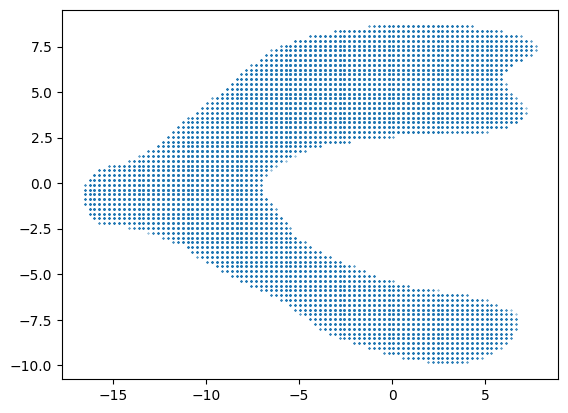

In [6]:
plt.scatter(X0[:,0],X0[:,1],s=0.1)

In [7]:
sl1

<44991x44991 sparse matrix of type '<class 'numpy.float64'>'
	with 300819 stored elements in COOrdinate format>

In [8]:
# P_final = scipy.sparse.coo_matrix((n_s,n_s))

In [9]:
eps = 5*methods.nndist(X0,k=7)/np.sqrt(2)

In [10]:
P = methods.dynamic_laplacian(traj,eps=None,include_mult=1.5)

In [11]:
P

<44991x44991 sparse matrix of type '<class 'numpy.float64'>'
	with 880365 stored elements in Compressed Sparse Row format>

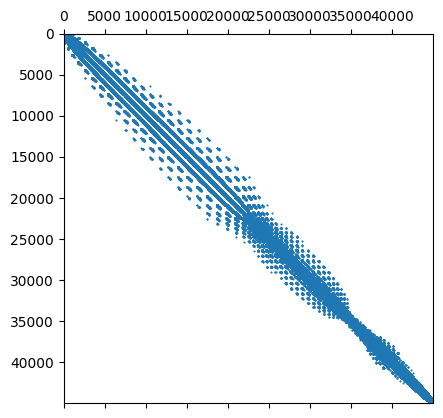

In [12]:
plt.spy(P,markersize=0.5)
# plt.imshow(P.todense())
# betterspy.show(P)

In [13]:
# betterspy.write_png(
#     "out.png",
#     P,
#     # border_width=2,
#     # border_color="red",
#     # colormap="viridis"
# )

In [14]:
vals, vecs= scipy.sparse.linalg.eigs(P,which='LM')

/Users/jackh/opt/anaconda3/envs/gordon_original/lib/python3.11/site-packages/matplotlib/axes/_axes.py:4411: ComplexWarning: Casting complex values to real discards the imaginary part
  c = np.asanyarray(c, dtype=float)


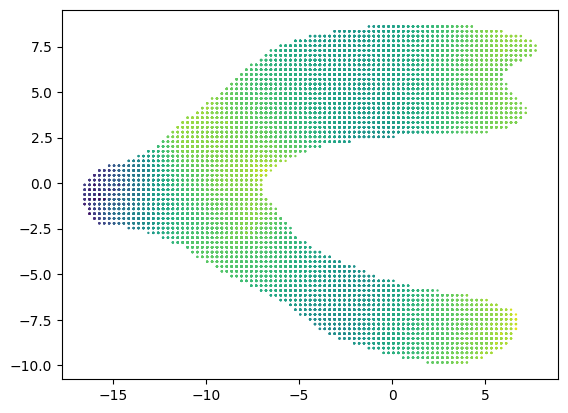

In [15]:
Xn = traj.Xat(0)
plt.scatter(Xn[:,0],Xn[:,1],c=vecs[:,5],s=0.5)

/Users/jackh/opt/anaconda3/envs/gordon_original/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


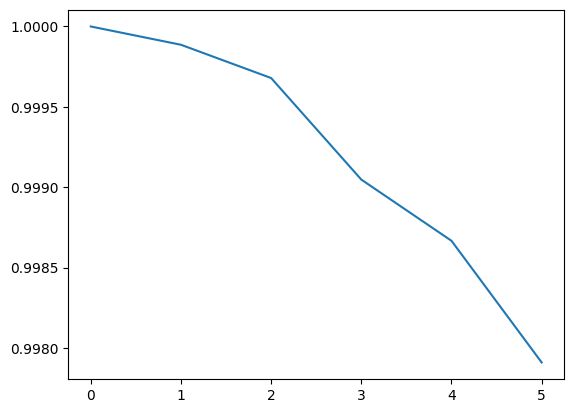

In [16]:
plt.plot(vals)

In [17]:
S, R = methods.SEBA(vecs[:,:3])

/Users/jackh/Documents/2023/Turbulence Research/Code/./src/methods.py:369: ComplexWarning: Casting complex values to real discards the imaginary part
  temp[i] = np.sign(z[i]) * np.max([np.abs(z[i]) - mu, 0])


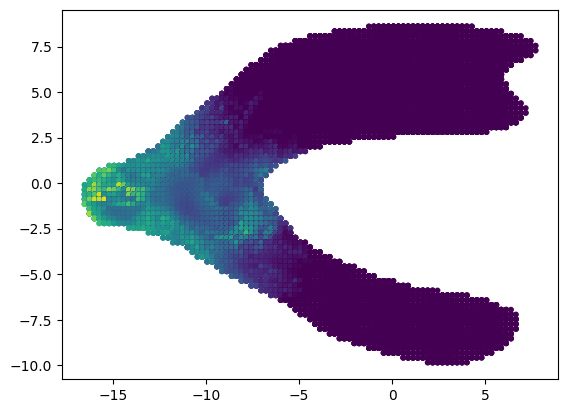

In [18]:
plt.scatter(Xn[:,0],Xn[:,1],c=S[:,2],s=10)

In [22]:
S

array([[ 0.61462233, -0.        ,  0.        ],
       [ 0.61232467, -0.        ,  0.        ],
       [ 0.57778659, -0.        ,  0.        ],
       ...,
       [ 0.        ,  0.66211056, -0.        ],
       [ 0.        ,  0.55283782, -0.        ],
       [ 0.        ,  0.57951618, -0.        ]])

In [20]:
# export...

output_path = "./examples/piv_001_20231103/data_01/"

for t_i in range(n_t):
    df = pd.DataFrame(pd.np.column_stack([traj.Xat(t_i),S]))
    df.to_csv(output_path+"seba_"+"{:02d}".format(t_i)+".csv")

In [21]:
df

NameError: name 'df' is not defined